In [6]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv('/content/credit_card_default.csv')

In [8]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# Data Preprocess

In [10]:
#missing Values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [13]:
data.shape

(30000, 25)

In [14]:
data = data.drop(columns=['ID','EDUCATION','AGE'])

In [15]:
# Separate features and target variable
x = data.drop(columns=['default payment next month'])  # Features
y = data['default payment next month']  # Target variable

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## **kNN Algorithm**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
metric_knn = []
n = np.arange(3,15)
for k in n:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_knn.append(acc)


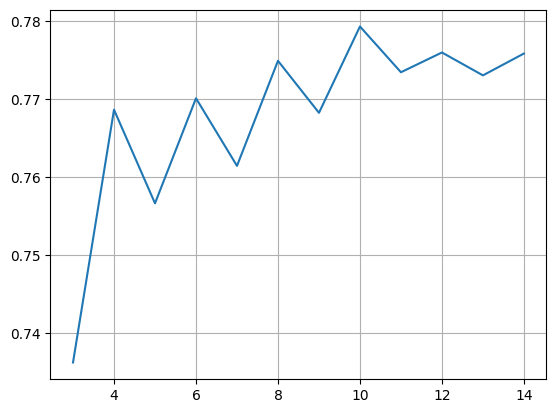

In [19]:
import matplotlib.pyplot as plt
plt.plot(n ,metric_knn)
plt.grid()
plt.show()

In [20]:
classifier=KNeighborsClassifier(n_neighbors=10,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [21]:
accuracy_score(y_test,y_pred)

0.7793333333333333

## **SVC**

In [22]:
from sklearn.svm import SVC

In [23]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [24]:
y_pred_svc=sv.predict(x_test)
accuracy_score(y_test,y_pred_svc)

0.7830666666666667

## **Adaboost**

In [25]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [26]:
y_pred_ada=ada.predict(x_test)
accuracy_score(y_test,y_pred_ada)

0.8168

## **Cross Validation of Ada Classifier**

In [27]:

from sklearn.model_selection import cross_val_score

In [28]:
cv_res=cross_val_score(ada,x,y,cv=5)
cv_res

array([0.80733333, 0.80816667, 0.82166667, 0.8275    , 0.82066667])

In [29]:
cv_res.mean()

0.8170666666666667

## **Grid Search Hyperparameter tuning**

In [30]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,200,50,300,500,400]}

In [31]:
grid_search=GridSearchCV(AdaBoostClassifier(),parameters,cv=5,scoring='accuracy',n_jobs=-1)

In [32]:
grid_result=grid_search.fit(x_train,y_train)

In [33]:
print('Best Parameters',grid_result.best_params_)
print('Best Score',grid_result.best_score_)

Best Parameters {'n_estimators': 500}
Best Score 0.8164888888888889


## **Randomized Search**

In [35]:

from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator=AdaBoostClassifier(),param_distributions=parameters,verbose=1,n_jobs=-1,n_iter=50)

In [36]:
random_result=random_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [37]:
print('Best Parameters',random_result.best_params_)
print('Best Score',random_result.best_score_)

Best Parameters {'n_estimators': 500}
Best Score 0.8164888888888889


## **Gradient Boost**

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf= GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)

In [39]:
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [40]:

y_pred_gb=gb_clf.predict(x_test)
accuracy_score(y_test,y_pred_gb)

0.8208

In [41]:
#Cross Validation of Gradient Boost
cv_res=cross_val_score(gb_clf,x,y,cv=5)
cv_res

array([0.8065    , 0.81033333, 0.822     , 0.83316667, 0.8255    ])

In [42]:
cv_res.mean()

0.8195

## **XGBoost**

In [43]:
import xgboost as xgb

In [44]:
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred_xgb=xgb_clf.predict(x_test)
accuracy_score(y_test,y_pred_xgb)

0.8108

In [48]:
#Cross validation of XGBoost
cv_res=cross_val_score(xgb_clf,x,y,cv=5)
cv_res.mean()

0.8121666666666666

In [ ]:

from sklearn.model_selection import GridSearchCV
parameters={'booster':['gbtree','gblinear']}

In [49]:
#Hyperparameter tuning of XGBoost

#Using Grid Search Hyperparameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV
parameters={'booster':['gbtree','gblinear']}

In [51]:

grid_search=GridSearchCV(xgb_clf,parameters,cv=5,scoring='accuracy',n_jobs=-1)

In [52]:
grid_result=grid_search.fit(x_train,y_train)

In [54]:
print('Best Parameters',grid_result.best_params_)
print('Best Score',grid_result.best_score_)

Best Parameters {'booster': 'gbtree'}
Best Score 0.810888888888889
